In [1]:
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
tokenizer = Tokenizer()
data = open('Collections.txt').read()
corpus = data.lower().split("\n")

In [4]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) +1

#print(tokenizer.word_index)
print(total_words)

1378


In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [6]:
print(tokenizer.word_index['drink'])
print(tokenizer.word_index['to'])
print(tokenizer.word_index['me'])
print(tokenizer.word_index['only'])
print(tokenizer.word_index['with'])
print(tokenizer.word_index['thine'])
print(tokenizer.word_index['eyes'])

333
7
12
53
16
151
27


In [7]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  4 13 45]
[0. 0. 0. ... 0. 0. 0.]


In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=20, verbose=1)
print(model)

Train on 4722 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
4722/4722 [==============================] - 24s 5ms/sample - loss: 6.2931 - acc: 0.0479
Epoch 2/20
4722/4722 [==============================] - 15s 3ms/sample - loss: 5.3003 - acc: 0.1294
Epoch 3/20
4722/4722 [==============================] - 15s 3ms/sample - loss: 4.2466 - acc: 0.2107
Epoch 4/20
4722/4722 [==============================] - 14s 3ms/sample - loss: 3.1617 - acc: 0.3227
Epoch 5/20
4722/4722 [==============================] - 15s 3ms/sample - loss: 2.2219 - acc: 0.4744
Epoch 6/20
4722/4722 [==============================] - 17s 4ms/sample - loss: 1.5187 - acc: 0.6404
Epoch 7/20
4722/4722 [==============================] - 17s 4ms/sample - loss: 1.1168 - acc: 0.7361
Epoch 8/20
4722/4722 [==============================] - 16s 3ms/sample - loss: 0.9584 - acc: 0.7819
Epoch 9/20
4722/4722 [==============================] - 16s 3ms/sample - loss: 0.833

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

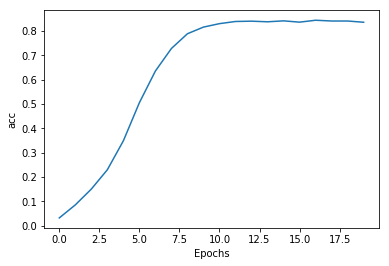

In [11]:
plot_graphs(history, 'acc')

In [11]:
seed_text = "Love"
next_words = 60
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Love is when you’re feeling top of the pops in the light of quitratue and my heart and is a clue is today and grace winter slay me my own out of a injury would harvest the story of the tree called compare which to like a puma in the barrens of a savage thought which compare to loving me blue
